## importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [4]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\3.concertriccir2.csv",header=None)
df1

0         1    2
0    0.700335 -0.247068  0.0
1   -3.950019  2.740080  1.0
2    0.150222 -2.157638  1.0
3   -1.672050 -0.941519  1.0
4    2.560483 -1.846577  1.0
..        ...       ...  ...
495  2.177895  2.984489  1.0
496  1.778905  2.869205  1.0
497  0.894180  3.069959  0.0
498  0.849439  3.875435  0.0
499  5.217443  1.400818  0.0

[500 rows x 3 columns]

In [5]:
df1[2]=df1[2].astype("int32")
df1[2].unique()


array([0, 1])

In [6]:
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]

In [7]:
cv

0      0
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    0
498    0
499    0
Name: 2, Length: 500, dtype: int32

In [8]:
knn=KNeighborsClassifier(n_neighbors=30)

<Axes: >

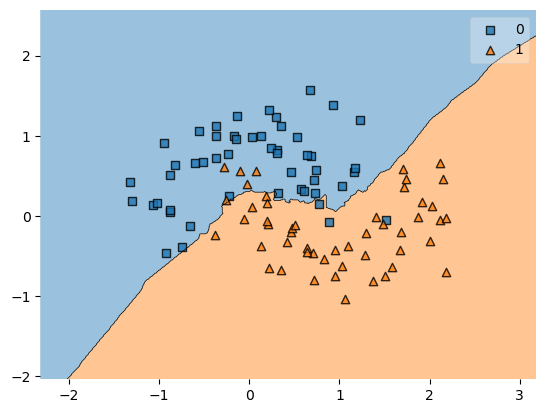

In [7]:
knn.fit(fv,cv)
plot_decision_regions(X=fv.values,y=cv.values,clf=knn)

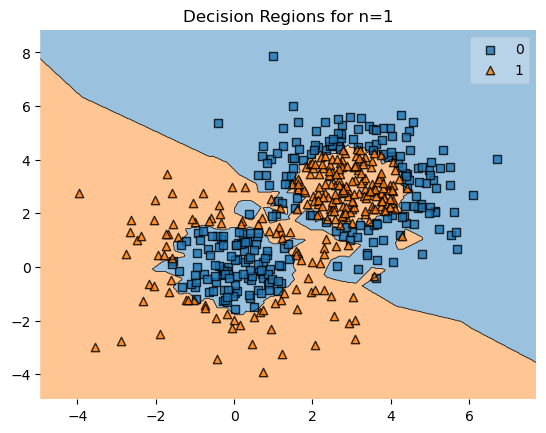

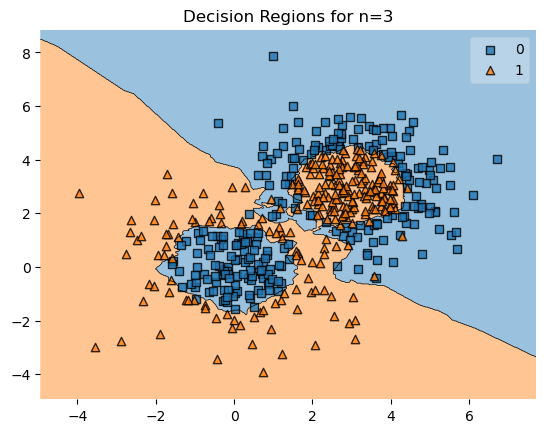

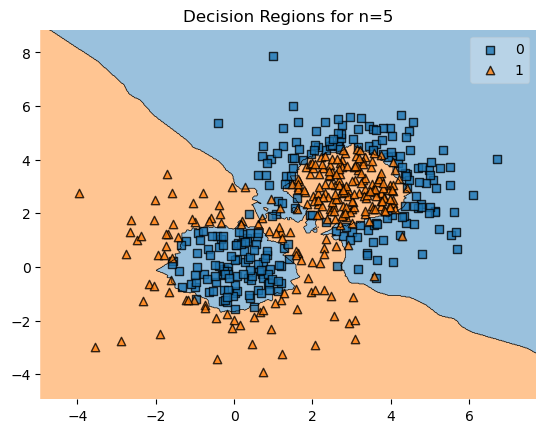

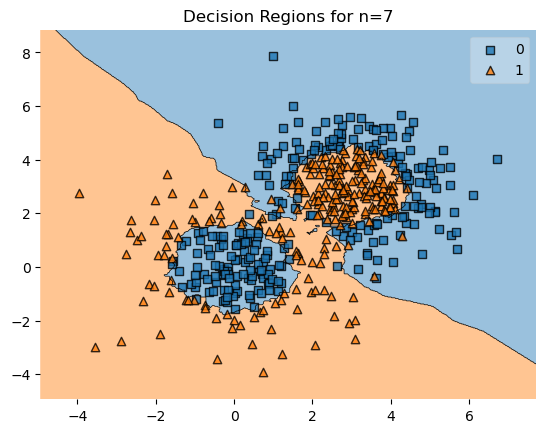

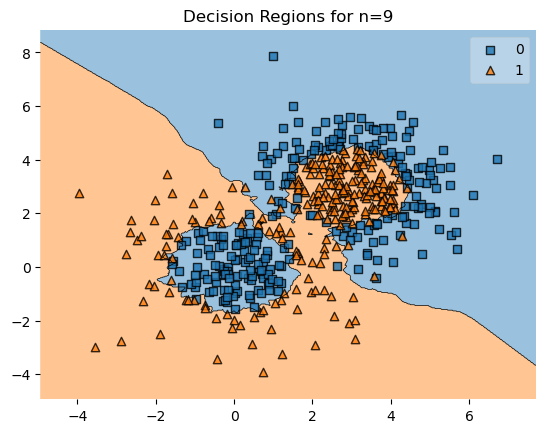

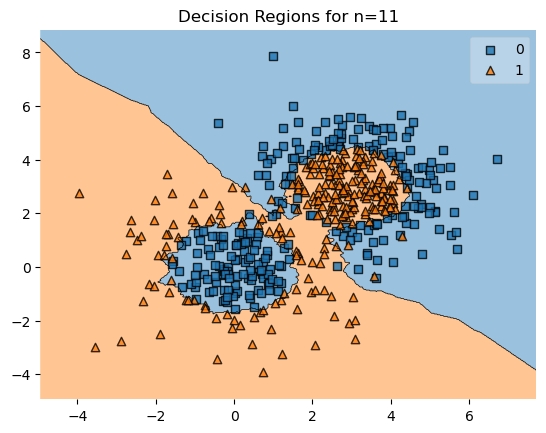

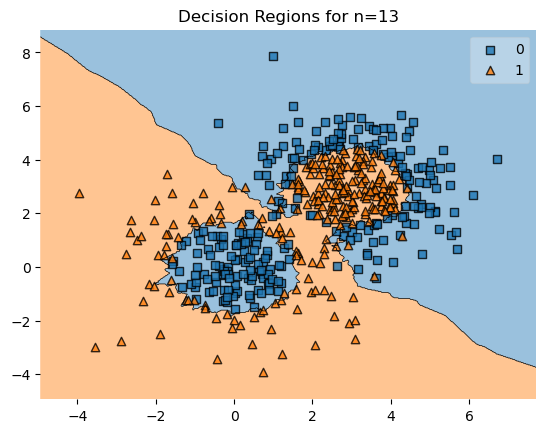

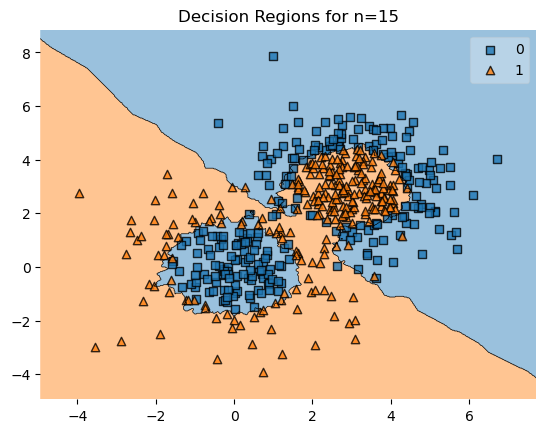

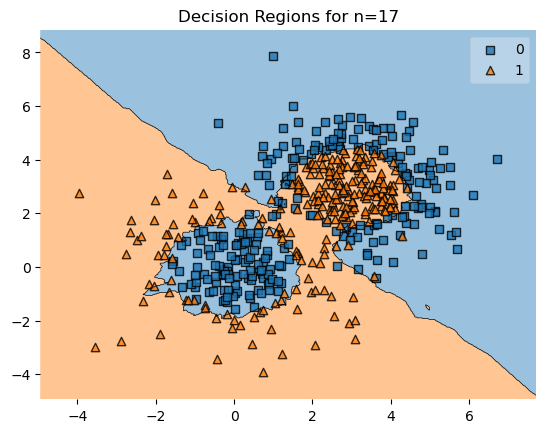

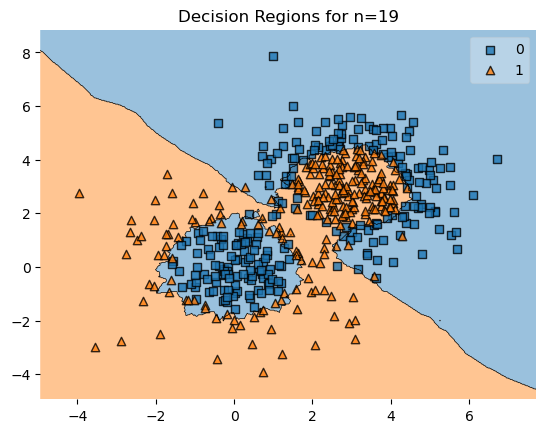

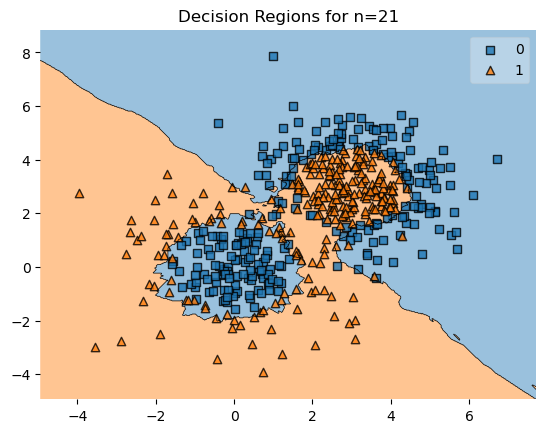

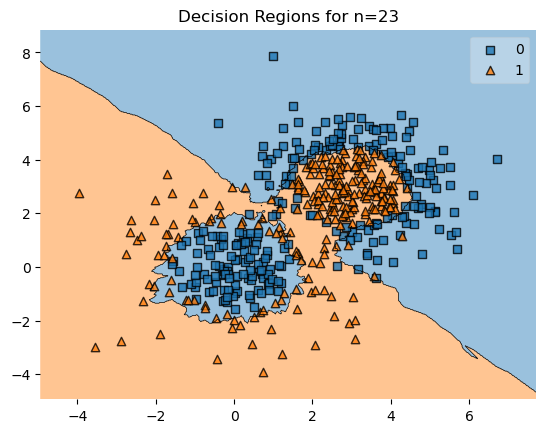

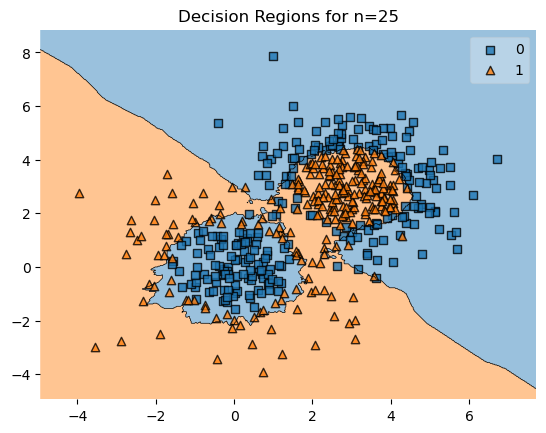

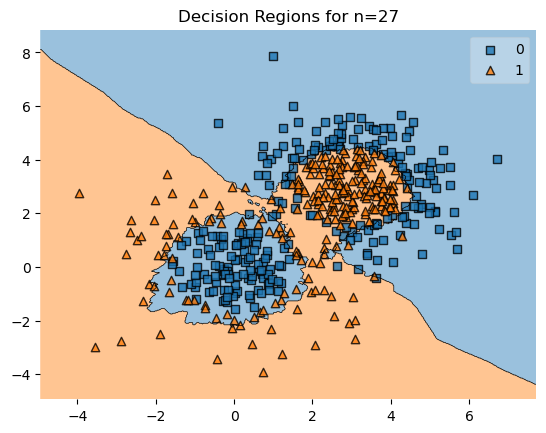

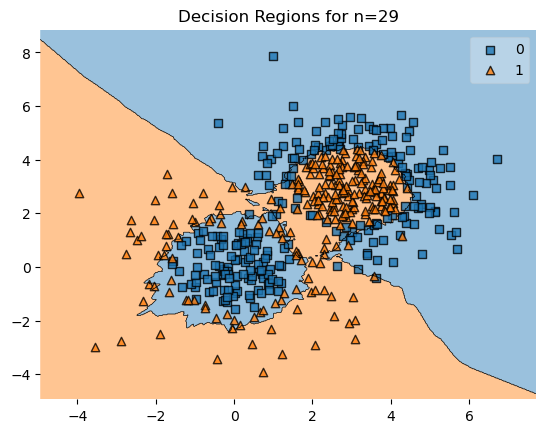

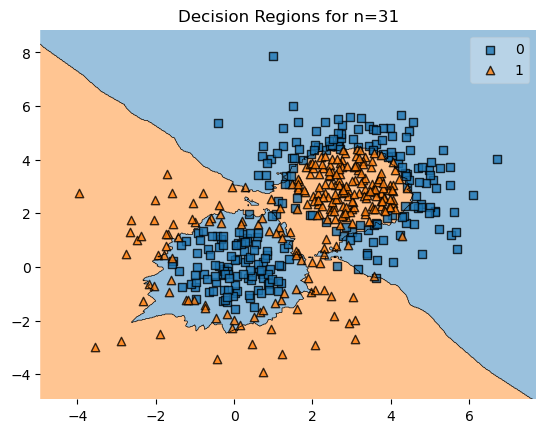

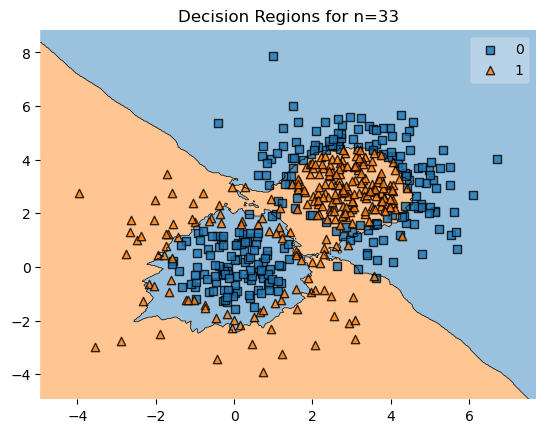

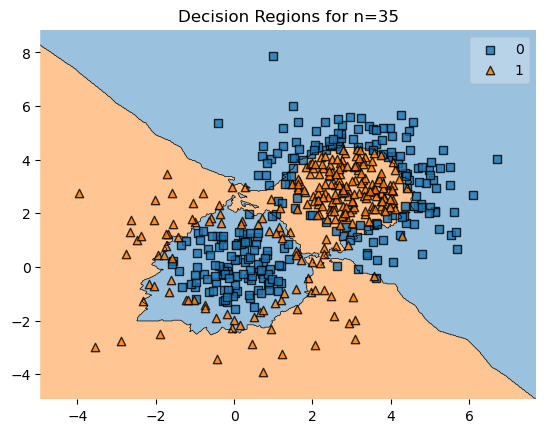

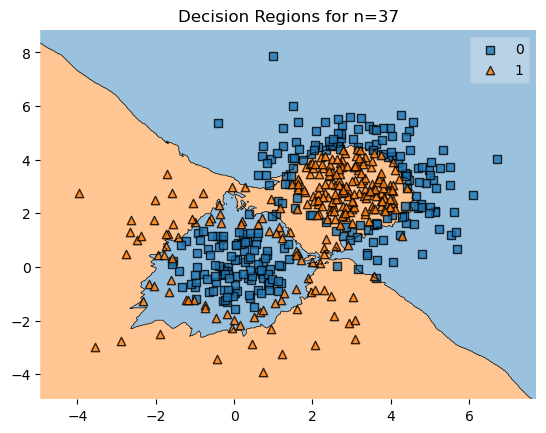

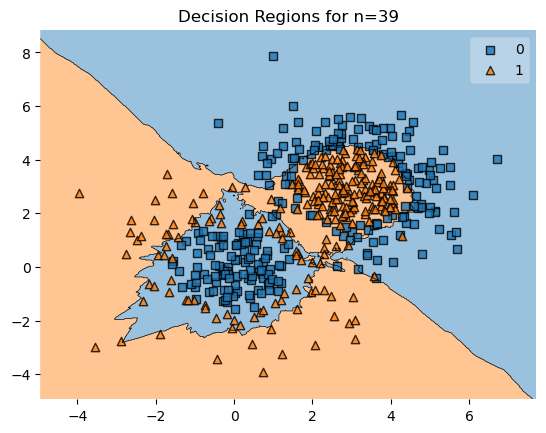

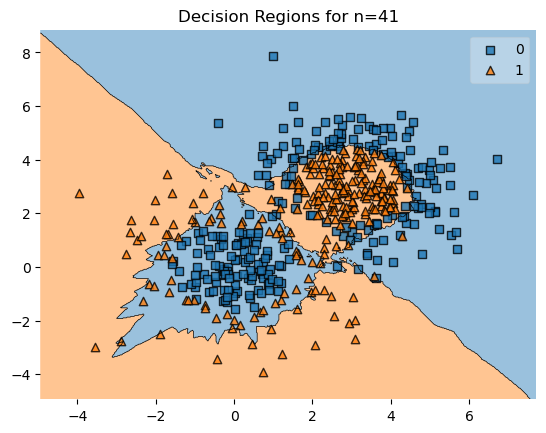

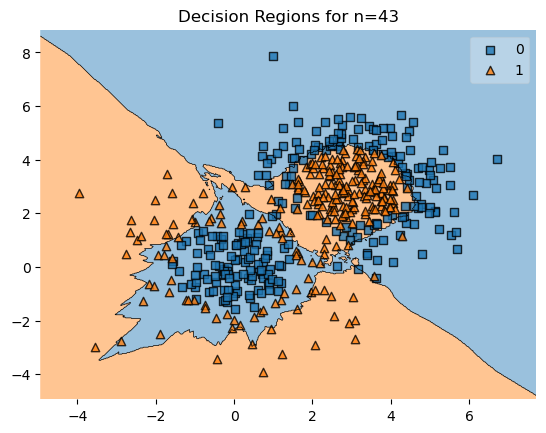

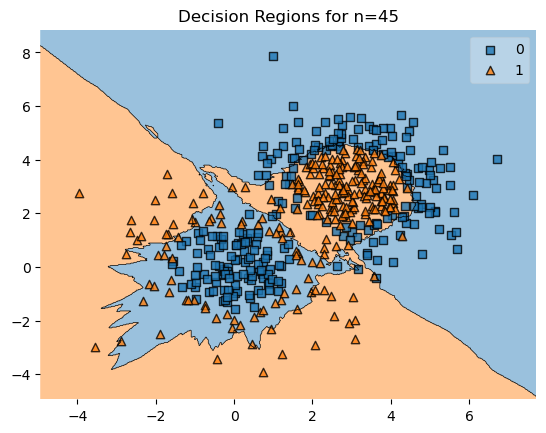

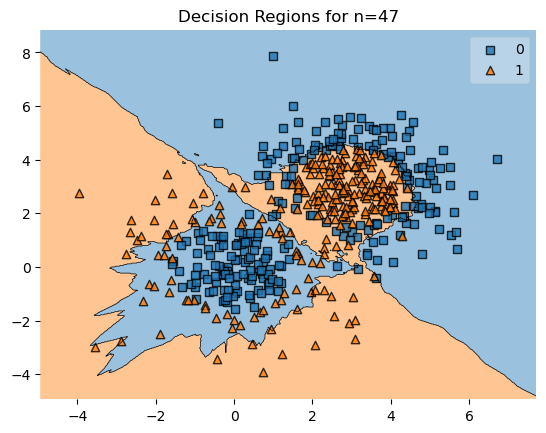

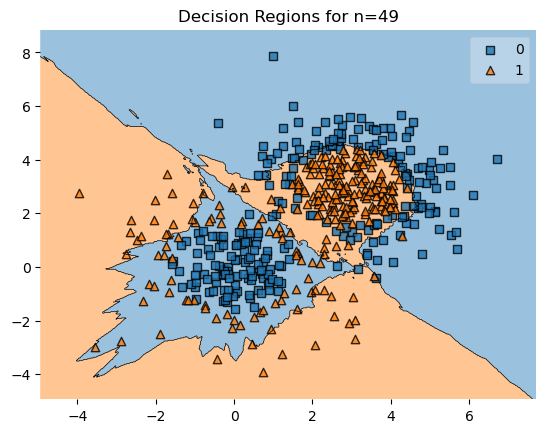

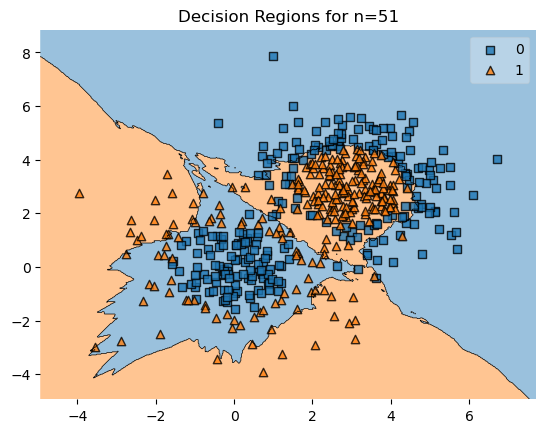

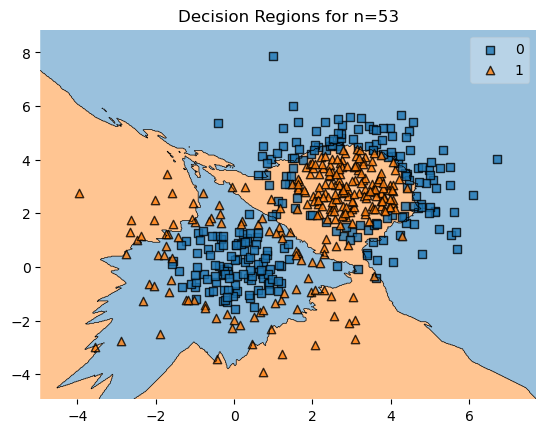

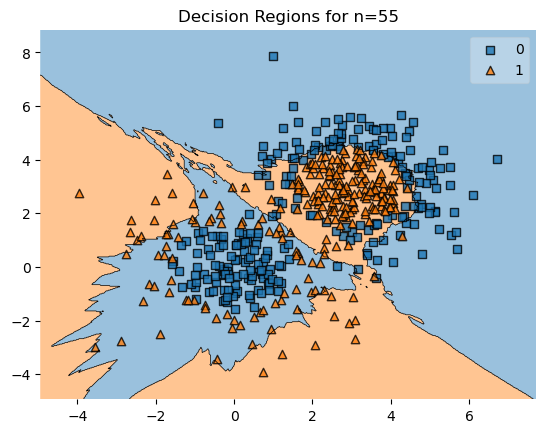

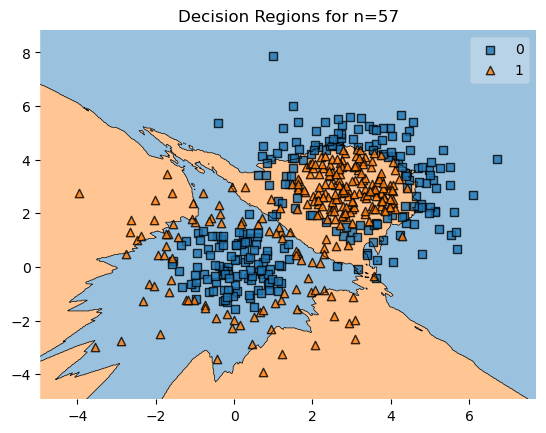

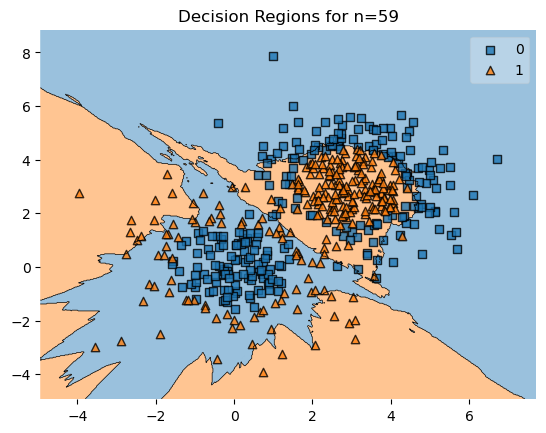

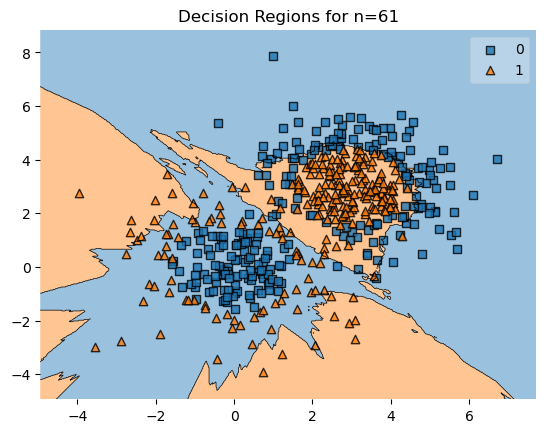

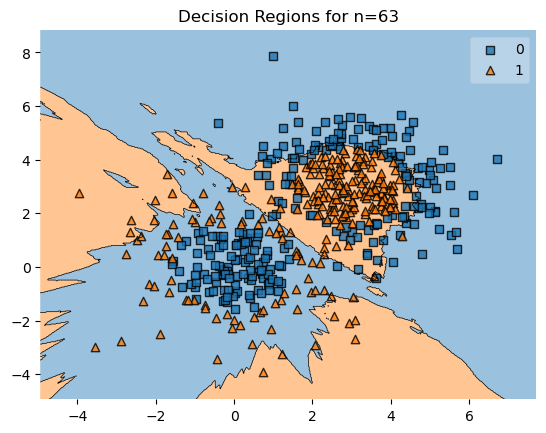

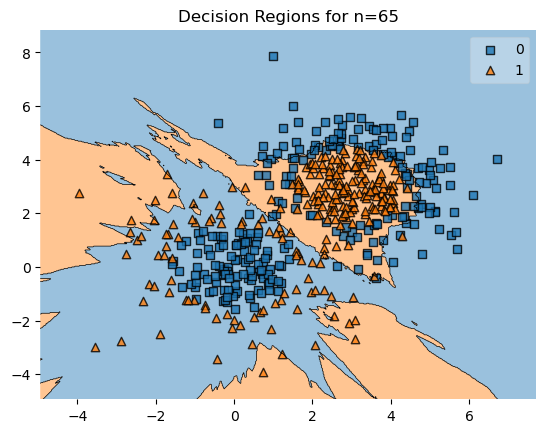

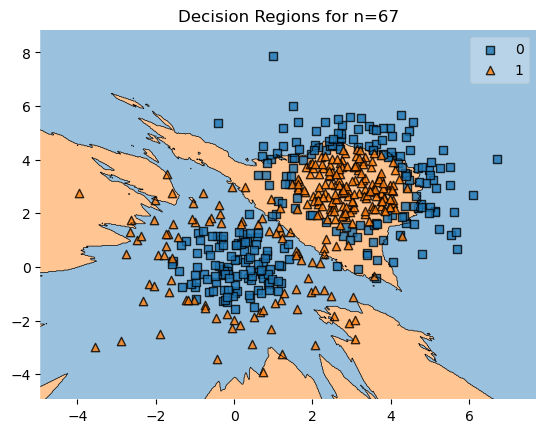

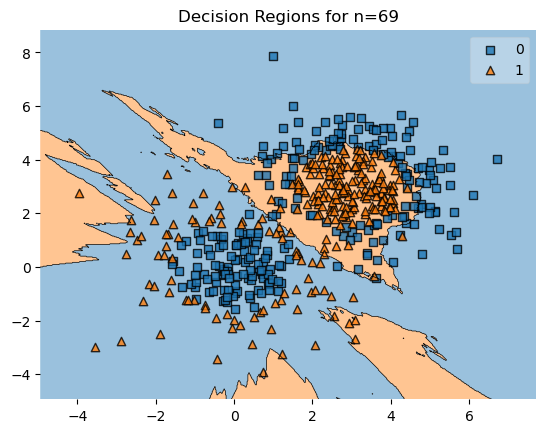

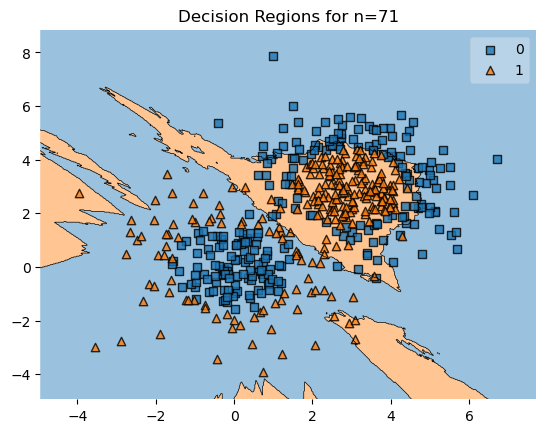

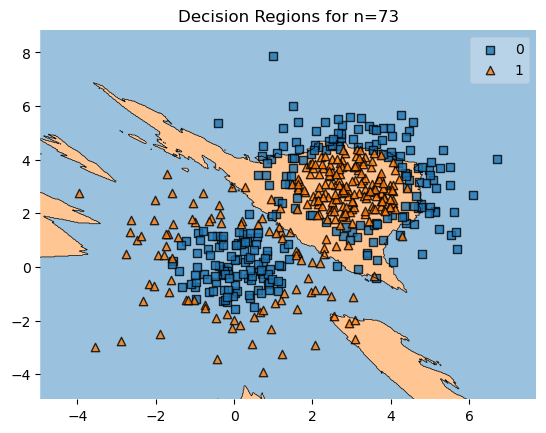

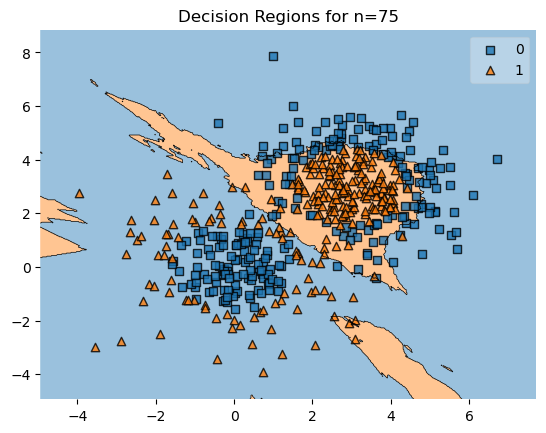

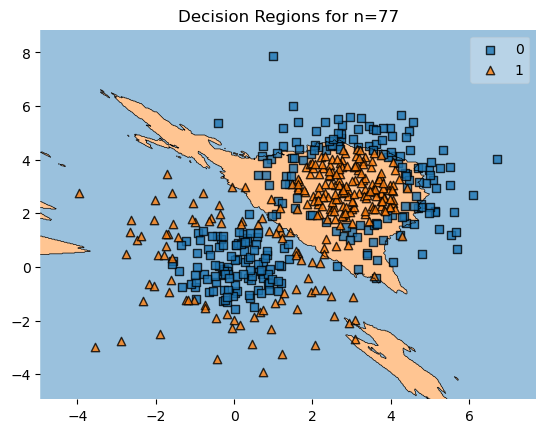

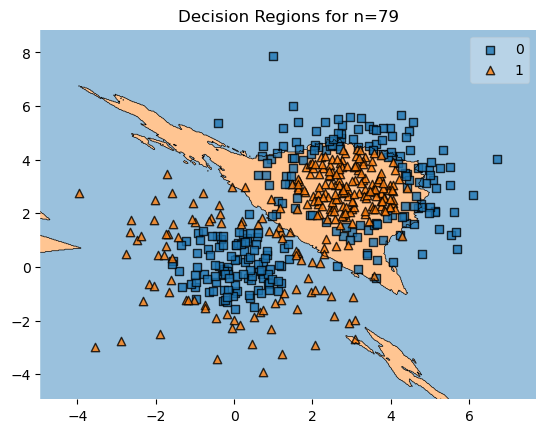

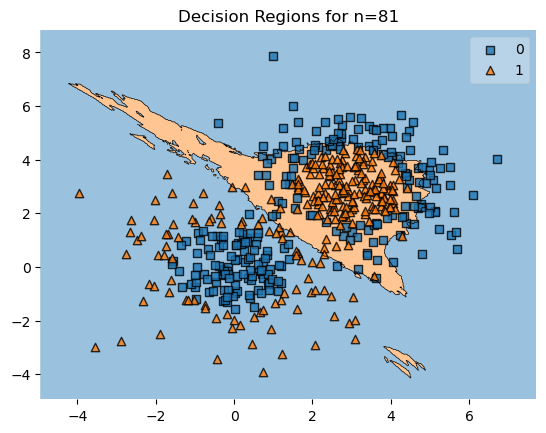

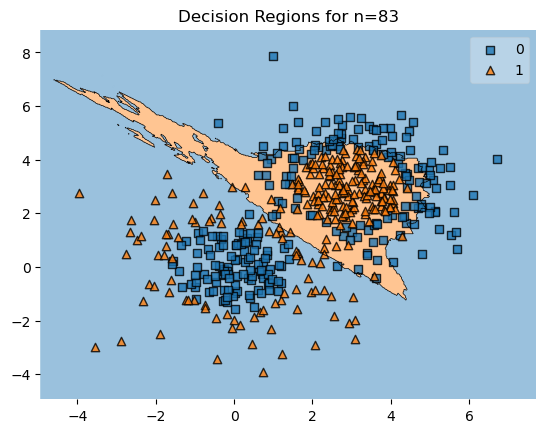

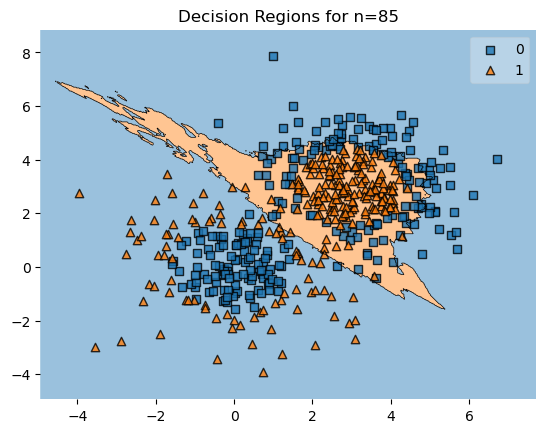

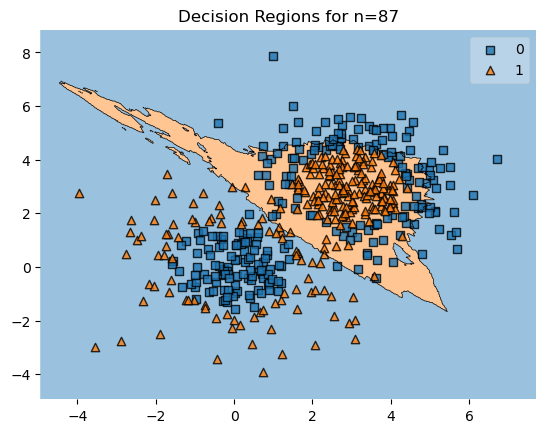

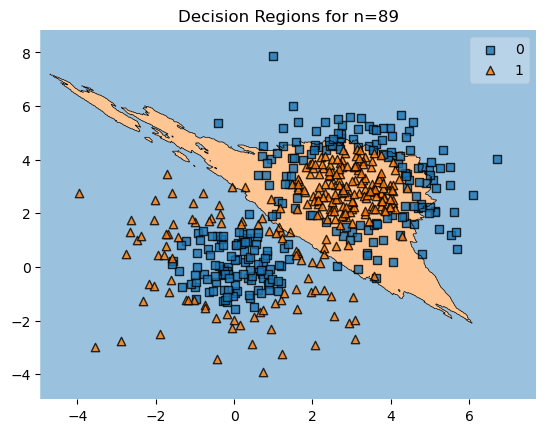

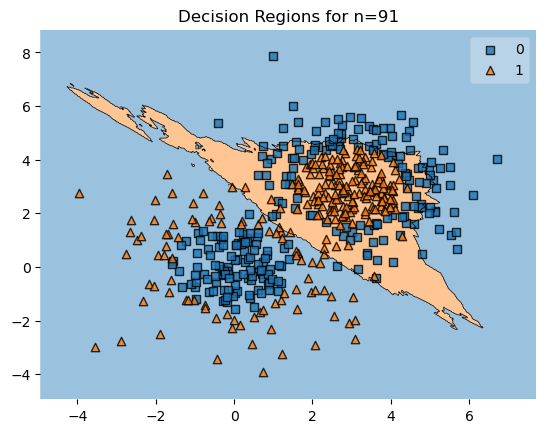

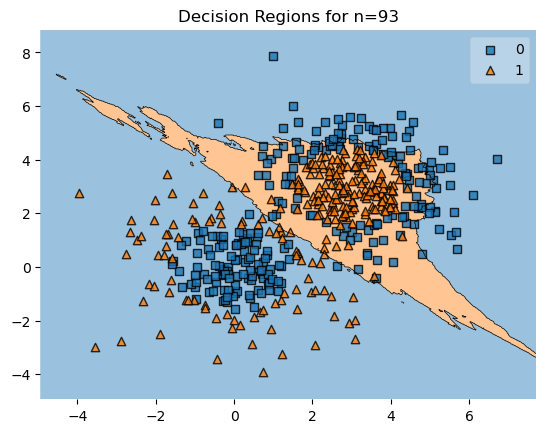

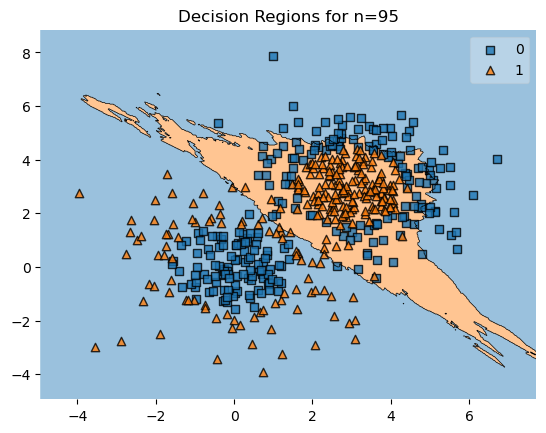

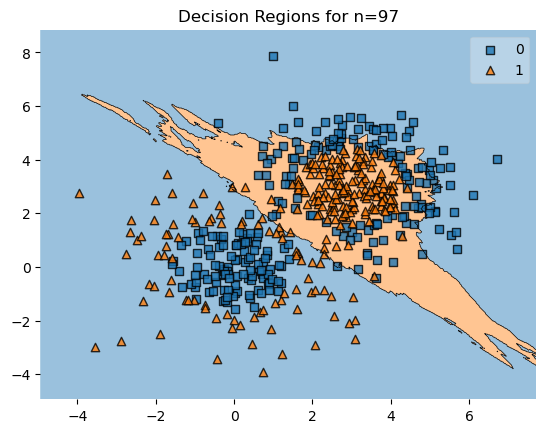

In [9]:
for n in range(1,99,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(fv,cv)
    plot_decision_regions(X=fv.values,y=cv.values,clf=knn)
    plt.title(f'Decision Regions for n={n}')
    plt.show()

In [11]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\3.concertriccir2.csv",header=None)
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]
df1.head()


0         1    2
0  0.700335 -0.247068  0.0
1 -3.950019  2.740080  1.0
2  0.150222 -2.157638  1.0
3 -1.672050 -0.941519  1.0
4  2.560483 -1.846577  1.0

In [12]:
X_train,X_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=42,stratify=cv)
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(X_train,y_train)
predicted=model.predict(X_test)

In [13]:
x_trinf,x_testf,cv_train,cv_test=train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [14]:
k=[]
acc=[]
err=[]
for n in range(1,95,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trinf,cv_train)
    predicted=model.predict(x_testf)

    k.append(n)
    acc.append(accuracy_score(cv_test,predicted))
    err.append(1-accuracy_score(cv_test,predicted))

In [15]:

x_trinf = np.ascontiguousarray(x_trinf)
cv_train = np.ascontiguousarray(cv_train)
x_testf = np.ascontiguousarray(x_testf)

In [21]:
k=[]
acc=[]
err=[]
for n in range(1,360,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trinf,cv_train)
    predicted=model.predict(x_testf)

    k.append(n)
    acc.append(accuracy_score(cv_test,predicted))
    err.append(1-accuracy_score(cv_test,predicted))

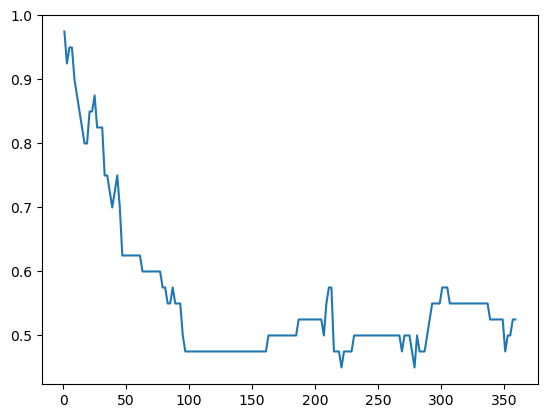

In [22]:
plt.plot(k,acc)
plt.show()

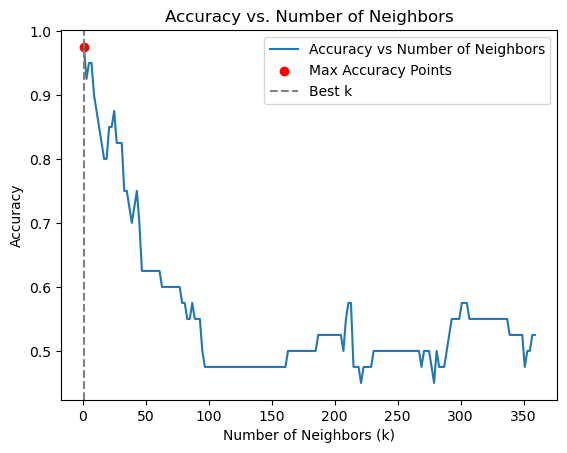

In [24]:
max_acc_indices = [i for i, j in enumerate(acc) if j == max(acc)]
plt.plot(k, acc, label='Accuracy vs Number of Neighbors')
plt.scatter([k[i] for i in max_acc_indices], [acc[i] for i in max_acc_indices], color='red', marker='o', label='Max Accuracy Points')
plt.axvline(x=k[max_acc_indices[0]], color='gray', linestyle='--', label='Best k')  # Assuming the first max index for vertical line

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()